<a href="https://colab.research.google.com/github/Xtrant/JST_FinalProject/blob/main/JST_Final_Project_Kelompok_2_Jimmy_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Traffic.csv to Traffic (1).csv


In [ ]:
import pandas as pd
data = pd.read_csv('Traffic.csv')
kelas = data['Traffic Situation'].unique().tolist()
kelas
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
print("NaN : ", data.isna().sum())
data.describe()

NaN :  Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64


,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [ ]:
import numpy as np

def onehot_enc(lbl, min_val=0):
  mi = min(lbl)
  length = len(bin(max(lbl) - mi +1)[2:])
  enc = []

  for i in lbl:
    b = bin(i-mi)[2:].zfill(length)
    enc.append([int(n) for n in b])

  return enc

def bin_dec(enc, mi=0):
  lbl = []

  for e in enc:
    rounded = [int(round(x)) for x in e]
    string = ''.join(str(x) for x in rounded)
    num = int(string, 2)+mi

    lbl.append(num)

  return lbl

In [ ]:
def onehot_enc(lbl, min_val=0):
  mi = min(lbl)
  enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)

  for i, x in enumerate(lbl):
    enc[i,x - mi] = 1

  return enc

def onehot_dec(enc, mi=0):
  return [np.argmax(e) + mi for e in enc]

In [ ]:
def onehot_enc_str(lbl_str, mapping=None):
    if mapping is None:
        mapping = {string: idx for idx, string in enumerate(lbl_str.unique())}

    length = len(mapping)
    enc = []
    for string in lbl_str:
        one_hot_vector = [0] * length
        one_hot_vector[mapping[string]] = 1
        enc.append(one_hot_vector)

    return enc, mapping


In [ ]:
def onehot_dec_str(enc, mapping):
  reverse_mapping = {v: k for k, v in mapping.items()}
  lbl_str = []
  for e in enc:
    idx = np.argmax(e)
    lbl_str.append(reverse_mapping[idx])

  return lbl_str

# encoded_onehot, mapping_onehot = onehot_enc_str(kelas)
# decoded_onehot = onehot_dec_str(encoded_onehot, mapping_onehot)

# encoded_onehot, decoded_onehot

In [ ]:
# One-hot encoding untuk kolom 'Traffic Situation'
kelas = data['Traffic Situation'].unique().tolist()
encoded_onehot, mapping_onehot = onehot_enc_str(data['Traffic Situation'])
decoded_onehot = onehot_dec_str(encoded_onehot, mapping_onehot)

# Buat mapping berdasarkan nilai unik
mapping_onehot = {value: idx for idx, value in enumerate(kelas)}

# Tampilkan hasil
print("Mapping:", mapping_onehot)
print("Encoded one-hot:", encoded_onehot)
print("Decoded one-hot:", decoded_onehot)

Mapping: {'low': 0, 'normal': 1, 'heavy': 2, 'high': 3}
Encoded one-hot: [[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# # Load dataset
# data = pd.read_csv('Traffic.csv')



# Pemrosesan Data
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
# data['Session'] = pd.cut(data['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Normalisasi atau Penskalaan
scaler = MinMaxScaler()
data[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']] = scaler.fit_transform(data[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']])

# Feature Engineering
data['IsWorkingDay'] = data['Day of the week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']).astype(int)

# Buang kolom yang tidak diperlukan
data = data.drop(['Time', 'Date', 'Day of the week', 'Hour'], axis=1)

# Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(data.drop('Traffic Situation', axis=1), encoded_onehot, test_size=0.2, random_state=42)

# Menggunakan encoded_onehot sebagai target
targets = np.array(y_train)

# Sesuaikan dengan one-hot encoding dari data pelatihan
y_train_array = np.array(y_train)

encoded_onehot = np.array(encoded_onehot)

# Fungsi aktivasi sigmoid dan derivatif sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Inisialisasi bobot secara acak
def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    return weights_input_hidden, weights_hidden_output

# Forward pass
def forward_pass(inputs, weights_input_hidden, weights_hidden_output):
    hidden_inputs = np.dot(inputs, weights_input_hidden)
    hidden_outputs = sigmoid(hidden_inputs)

    final_inputs = np.dot(hidden_outputs, weights_hidden_output)
    final_outputs = sigmoid(final_inputs)

    return hidden_outputs, final_outputs

# Backward pass dan pembaruan bobot
def backward_pass(inputs, target, hidden_outputs, final_outputs, weights_hidden_output, weights_input_hidden, learning_rate):
  output_error = np.array(target) - final_outputs
  output_delta = output_error * sigmoid_derivative(final_outputs)

  hidden_error = output_delta.dot(weights_hidden_output.T)
  hidden_delta = hidden_error * sigmoid_derivative(hidden_outputs)

  # Modifikasi pembaruan bobot untuk menangani one-hot encoding
  weights_hidden_output += hidden_outputs.T.dot(output_delta) * learning_rate
  weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate

# Mengkonversi "Session" ke label encoding
# session_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}
# data['Session'] = data['Session'].map(session_mapping)

# Pelatihan model
def train_neural_network(inputs, targets, hidden_size, epochs, learning_rate):
    input_size = inputs.shape[1]
    output_size = targets.shape[1]

    weights_input_hidden, weights_hidden_output = initialize_weights(input_size, hidden_size, output_size)

    for epoch in range(epochs):
      for i in range(len(inputs)):
        # Pilih hanya kolom-kolom numerik untuk input
        input_data = inputs.iloc[i:i+1, :].to_numpy().astype(float)
        # input_data[0][4] = session_mapping[input_data[0][4]]
        target = np.array([y_train_array[i]])  # Hapus to_numpy()

        hidden_outputs, final_outputs = forward_pass(input_data, weights_input_hidden, weights_hidden_output)
        backward_pass(input_data, target, hidden_outputs, final_outputs, weights_hidden_output, weights_input_hidden, learning_rate)

      if epoch % 100 == 0:
        loss = np.mean(np.square(target - final_outputs))
        print(f'Epoch {epoch}, Loss: {loss}')

    return weights_input_hidden, weights_hidden_output

# Membuat model dengan fungsi train_neural_network
trained_weights_input_hidden, trained_weights_hidden_output = train_neural_network(X_train, np.array(y_train_array), hidden_size=4, epochs=1000, learning_rate=0.1)

# Uji model

true_labels = []
predicted_labels = []

for i in range(len(X_test)):
    input_data = X_test.iloc[i:i+1].to_numpy()
    _, prediction = forward_pass(input_data, trained_weights_input_hidden, trained_weights_hidden_output)
    decoded_prediction = onehot_dec_str(prediction, mapping_onehot)

    # Menggunakan argmax untuk mendapatkan indeks kelas yang diprediksi dan label sebenarnya
    pred_index = np.argmax(prediction)
    true_index = np.argmax(y_test[i])

    print(f'Input: {input_data}, True Label: {decoded_onehot[true_index]}, Prediction: {decoded_prediction}\n')

    true_labels.append(true_index)
    predicted_labels.append(pred_index)


Epoch 0, Loss: 0.10270411483706006
Epoch 100, Loss: 0.007077764740346394
Epoch 200, Loss: 0.00695994938084743
Epoch 300, Loss: 0.004591495189936363
Epoch 400, Loss: 0.007133521657540495
Epoch 500, Loss: 0.0071097468864420275
Epoch 600, Loss: 0.007759286548699843
Epoch 700, Loss: 0.006698645437289645
Epoch 800, Loss: 0.0058491217393394235
Epoch 900, Loss: 0.007395750497998238
Input: [[0.05172414 0.07142857 0.         0.25       0.03488372 0.
  0.        ]], True Label: low, Prediction: ['normal']

Input: [[ 0.45977011  0.21428571  0.3         0.575       0.45736434 30.
   1.        ]], True Label: low, Prediction: ['normal']

Input: [[ 0.55172414  0.07142857  0.38        0.275       0.4496124  45.
   1.        ]], True Label: low, Prediction: ['normal']

Input: [[5.91954023e-01 2.00000000e-01 7.60000000e-01 2.50000000e-02
  5.46511628e-01 4.50000000e+01 0.00000000e+00]], True Label: low, Prediction: ['heavy']

Input: [[ 0.04597701  0.02857143  0.02        0.65        0.08527132 15.
   0

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate accuracy
correct_predictions = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
accuracy = correct_predictions / len(X_test)
print(f'\nAccuracy: {accuracy * 100:.2f}%')

# Menghitung presisi, recall, dan F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=1)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 74.33%

Precision: 0.80
Recall: 0.74
F1 Score: 0.65


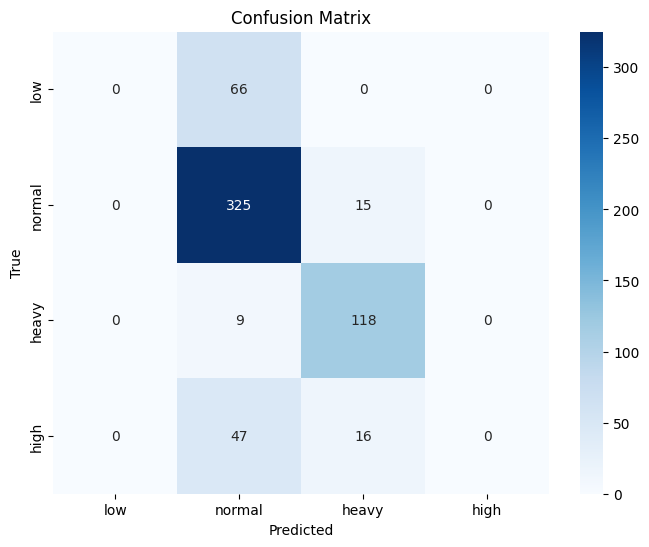

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=kelas, yticklabels=kelas)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


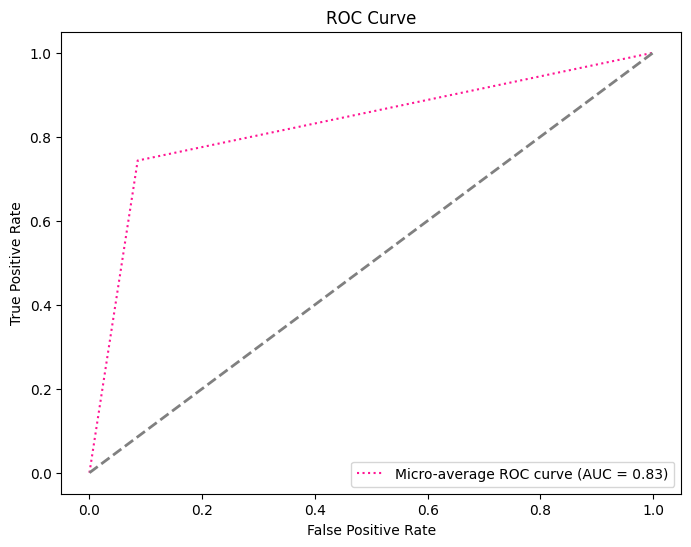

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the true labels
binarized_labels = label_binarize(true_labels, classes=np.unique(true_labels))

# Assuming predicted_labels is a list, convert it to a numpy array
predicted_labels_np = label_binarize(predicted_labels, classes=np.unique(true_labels))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(kelas)):
  # print(binarized_labels.shape, predicted_labels_np.shape)
  fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], predicted_labels_np[:, i], pos_label=1)  # Assuming binary classification
  roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(binarized_labels.ravel(), predicted_labels_np.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
